<a href="https://colab.research.google.com/github/sjnetk/Python/blob/main/%EB%84%A4%EC%9D%B4%EB%B2%84%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%9E%A9_%EC%87%BC%ED%95%91%EB%B6%84%EC%84%9D%EC%8B%A4%EC%8A%B5(%EA%B3%B5%EC%9C%A0).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#설정


In [ ]:
# client_id = "각자"
# client_secret -"각자"

## 기본코드

In [ ]:
#-*- coding: utf-8 -*-
import os
import sys
import urllib.request
# client_id = "YOUR_CLIENT_ID"
# client_secret = "YOUR_CLIENT_SECRET"
url = "https://openapi.naver.com/v1/datalab/shopping/categories";
body = "{\"startDate\":\"2020-08-01\",\"endDate\":\"2022-09-30\",\"timeUnit\":\"month\",\"category\":[{\"name\":\"패션목걸이\",\"param\":[\"50004174\"]},{\"name\":\"유리닦이용품\",\"param\":[\"50001845\"]}],\"device\":\"pc\",\"ages\":[\"20\",\"50\"],\"gender\":\"\"}";

request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
request.add_header("Content-Type","application/json")
response = urllib.request.urlopen(request, data=body.encode("utf-8"))
rescode = response.getcode()
if(rescode==200):
    response_body = response.read()
    print(response_body.decode('utf-8'))
else:
    print("Error Code:" + rescode)

{"startDate":"2020-08-01","endDate":"2022-09-30","timeUnit":"month","results":[{"title":"패션목걸이","category":["50004174"],"data":[{"period":"2020-08-01","ratio":98.32145},{"period":"2020-09-01","ratio":99.91047},{"period":"2020-10-01","ratio":81.99955},{"period":"2020-11-01","ratio":83.13457},{"period":"2020-12-01","ratio":100},{"period":"2021-01-01","ratio":79.25951},{"period":"2021-02-01","ratio":69.5591},{"period":"2021-03-01","ratio":87.39648},{"period":"2021-04-01","ratio":86.25507},{"period":"2021-05-01","ratio":86.05364},{"period":"2021-06-01","ratio":94.85884},{"period":"2021-07-01","ratio":99.80496},{"period":"2021-08-01","ratio":90.83351},{"period":"2021-09-01","ratio":82.70294},{"period":"2021-10-01","ratio":79.01333},{"period":"2021-11-01","ratio":77.84634},{"period":"2021-12-01","ratio":98.40138},{"period":"2022-01-01","ratio":78.19164},{"period":"2022-02-01","ratio":74.3038},{"period":"2022-03-01","ratio":86.86894},{"period":"2022-04-01","ratio":85.58365},{"period":"2022-05

## 기초 응용
"위 코드를 활용하여 데이터프레임에 입력한 후,   category의 name별 그래프를 그려주는 파이썬 코드를 작성해줘. 단 한글표기로 해줘."

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 39 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

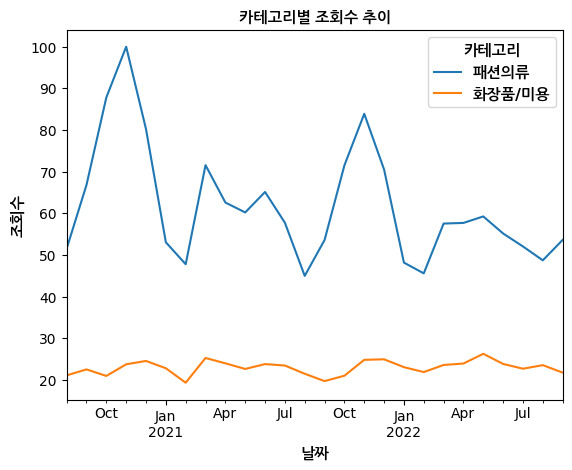

In [ ]:
#-*- coding: utf-8 -*-
import os
import sys
import urllib.request
import pandas as pd
import json
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager as fm

# For Korean font in plotting

# 폰트 경로를 설정
path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'
fontprop = fm.FontProperties(fname=path, size=11)

# client_id = "YOUR_CLIENT_ID"
# client_secret = "YOUR_CLIENT_SECRET"
url = "https://openapi.naver.com/v1/datalab/shopping/categories";
body = "{\"startDate\":\"2020-08-01\",\"endDate\":\"2022-09-30\",\"timeUnit\":\"month\",\"category\":[{\"name\":\"패션의류\",\"param\":[\"50000000\"]},{\"name\":\"화장품/미용\",\"param\":[\"50000002\"]}],\"device\":\"pc\",\"ages\":[\"20\",\"30\"],\"gender\":\"f\"}";

request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
request.add_header("Content-Type","application/json")
response = urllib.request.urlopen(request, data=body.encode("utf-8"))
rescode = response.getcode()

if(rescode==200):
    response_body = response.read()
    response_dict = json.loads(response_body.decode('utf-8'))  # Convert JSON response to Python dict

    df_list = []
    for category in response_dict['results']:
        df_temp = pd.DataFrame(category['data'])
        df_temp['category'] = category['title']
        df_list.append(df_temp)

    df = pd.concat(df_list, ignore_index=True)
    df['period'] = pd.to_datetime(df['period'])

    df.pivot(index='period', columns='category', values='ratio').plot()
    plt.title('카테고리별 조회수 추이', fontproperties=fontprop)
    plt.xlabel('날짜', fontproperties=fontprop)
    plt.ylabel('조회수', fontproperties=fontprop)
    legend = plt.legend(title='카테고리')
    plt.setp(legend.get_title(), fontproperties=fontprop)
    plt.setp(legend.get_texts(), fontproperties=fontprop)
    plt.show()
else:
    print("Error Code:" + rescode)
